### Imports + parameters

In [13]:
import librosa
from audio_preprocess import AudioPreprocessor
import soundfile as sf

In [14]:
# Define parameters of AudioPreprocessor
SAMPLE_RATE = 22050
DURATION = 10
HOP_LENGTH_FACTOR = 31.25
N_FFT = 512*16
MONO = True
hop_length = int(SAMPLE_RATE / HOP_LENGTH_FACTOR)
# Create an instance of an object of class AudioPreprocessor
audiopreprocessor = AudioPreprocessor(SAMPLE_RATE, DURATION, HOP_LENGTH_FACTOR, N_FFT)


### Loading audio and preprocessing + spec

In [15]:
# Load each audio file and add information to the list, limiting to the first tot files

audio_file = "your_audio_file.wav"


audio_section = audiopreprocessor.load_audio(audio_file)
audio_section = audiopreprocessor.normalize_amplitude(audio_section)
# spectrogram = audiopreprocessor.compute_log_spectrogram(audio_section)


print("--- Preprocessing completed successfully ---")

--- Preprocessing completed successfully ---


### Visualize audio

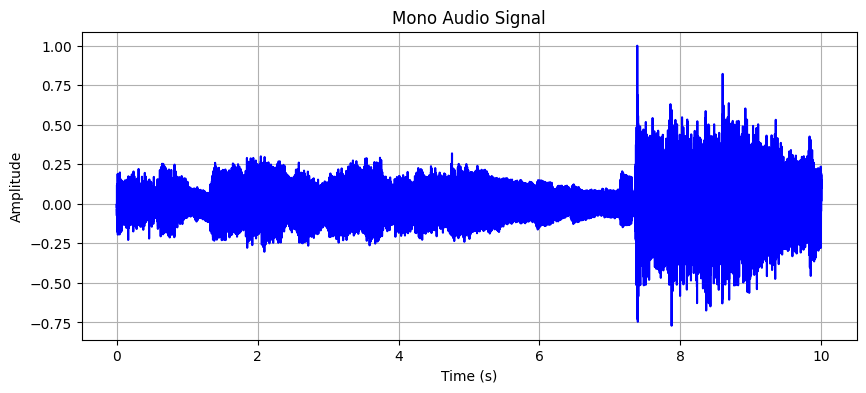

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your audio signal stored in a variable named 'audio_signal'
# Generate time array
duration = 10  # Duration of the audio signal in seconds
sample_rate = 22050  # Sample rate (Hz)
t = np.linspace(0, duration, len(audio_section), endpoint=False)  # Time array

# Plot the audio signal
plt.figure(figsize=(10, 4))
plt.plot(t, audio_section, color='b')
plt.title('Mono Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Spectrogram + Random Crop + Padding

In [17]:
stft_result = librosa.stft(audio_section, n_fft=N_FFT, hop_length=hop_length)
log_spec = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

In [18]:
import numpy as np

# Dimensions of the crop
crop_height = 700
crop_width = 100

start_row = 10
start_col = 0


# Take the random crop
crop_stft = stft_result[start_row:start_row + crop_height, start_col:start_col + crop_width]
crop_spec = log_spec[start_row:start_row + crop_height, start_col:start_col + crop_width]

# Initialize padded arrays with zeros
padded_stft_result = np.zeros_like(stft_result)
padded_log_spec = np.zeros_like(log_spec)

# Place the crop in the original-sized arrays
padded_stft_result[start_row:start_row + crop_height, start_col:start_col + crop_width] = crop_stft
padded_log_spec[start_row:start_row + crop_height, start_col:start_col + crop_width] = crop_spec

print(f"Random crop start indices: ({start_row}, {start_col})")
print("Random crop dimensions:", crop_stft.shape)
print("Padded stft_result dimensions:", padded_stft_result.shape)
print("Padded log_spec dimensions:", padded_log_spec.shape)


Random crop start indices: (10, 0)
Random crop dimensions: (200, 100)
Padded stft_result dimensions: (4097, 313)
Padded log_spec dimensions: (4097, 313)


### Visualize the two spectrograms (normal and cropped+padding)

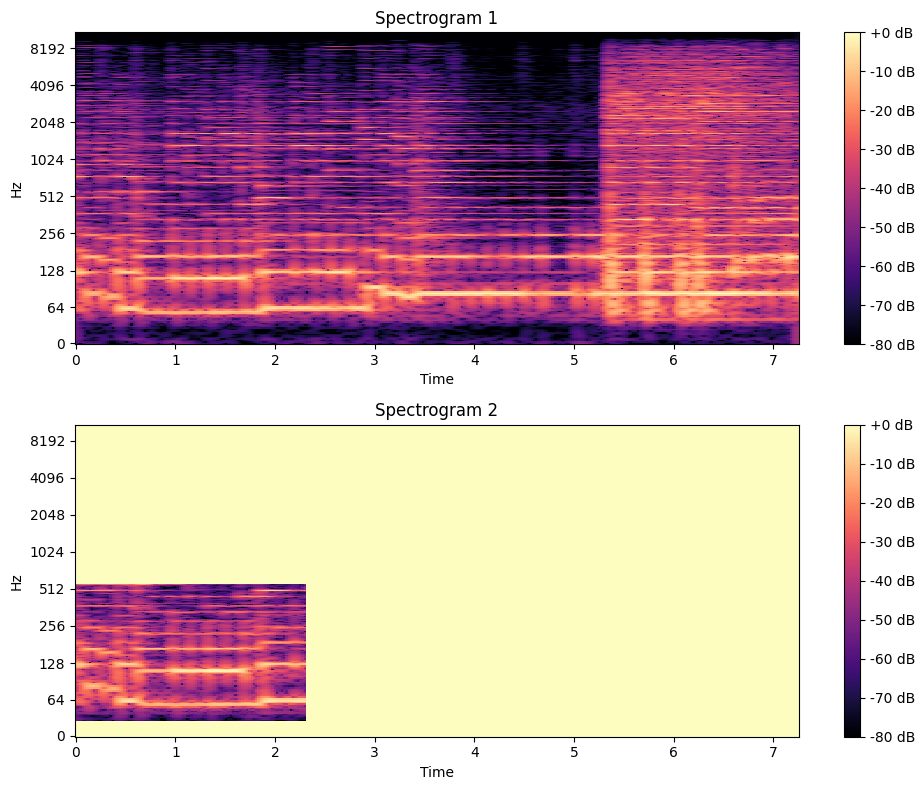

In [19]:
import matplotlib.pyplot as plt
import librosa.display

# Create a figure with two subplots, one below the other
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# First spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(log_spec, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram 1')
plt.tight_layout()

# Second spectrogram (can be the same or different)
plt.subplot(2, 1, 2)
librosa.display.specshow(padded_log_spec, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram 2')
plt.tight_layout()

# Display the plots
plt.show()


In [20]:
reconstruction_audio = librosa.istft(crop_stft, n_fft = N_FFT, hop_length=hop_length)

### Reconstruct and Save audio in output file

In [21]:
input_audio_path = "input_audio.mp3"
sf.write(input_audio_path, audio_section, SAMPLE_RATE, format='MP3')


cropped_file_path = 'cropped_audio.mp3'
sf.write(cropped_file_path, reconstruction_audio, SAMPLE_RATE, format='MP3')

print(f"Audio saved as {cropped_file_path}")

Audio saved as cropped_audio.mp3
